# Mercado imobiliário

### Metadados

- price: Preço é o alvo da previsão
- bedrooms: Número de quartos/casa
- bathrooms: Número de banheiros/quartos
- sqft_living: metragem quadrada da casa
- sqft_lot: metragem quadrada do terreno
- floors: Total de andares (níveis) na casa
- waterfront: Casa com vista para a orla
- view: Foi visualizada
- condition: Quão boa é a condição geral
- grade: nota geral dada à unidade habitacional, com base no sistema de classificação do Condado de King
- sqft_above: metragem quadrada da casa, exceto o porão
- sqft_basement: metragem quadrada do porão
- yr_built: Ano de construção
- yr_renovated: Ano em que a casa foi renovada
- zipcode: código postal
- lat: Coordenada de latitude
- long: Coordenada de longitude
- sqft_living15: Área da sala de estar em 2015 (implica algumas renovações). Isso pode ou não ter afetado a área do terreno
- sqft_lot15: Área do terreno em 2015 (implica algumas renovações)

objetivo principal:

In [88]:
# Bibliotecas necesárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [89]:
data = pd.read_csv("house_data.csv")

In [90]:
data.head(5)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [91]:
#Visualizando o tipo dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [92]:
# Retirando colunas irrelevantes
data.drop(columns=["Unnamed: 0", "id", "date"] ,inplace=True)

In [93]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [94]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [95]:
data.isna().sum()

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [96]:
#Completar valores vazios pela mediana para evitar que os outliers influenciem no resultado
data["bedrooms"].fillna(data["bedrooms"].median(), inplace=True)
data["bathrooms"].fillna(data["bathrooms"].median(), inplace=True)

C:\Users\teodo\AppData\Local\Temp\ipykernel_18020\2123565067.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["bedrooms"].fillna(data["bedrooms"].median(), inplace=True)
C:\Users\teodo\AppData\Local\Temp\ipykernel_18020\2123565067.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [97]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [98]:
# Adicionando features com base em outras
data["price_per_sqft"] =data["price"]/data["sqft_living"]

# EDA (Exploratory Data Analysis)

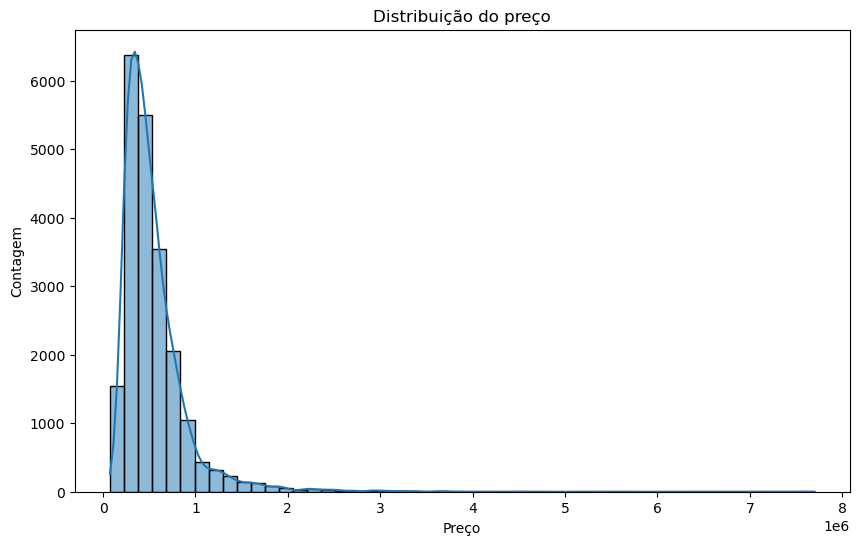

In [99]:
# Distribuição do preço
plt.figure(figsize=(10,6))
sns.histplot(data["price"],bins=50,kde=True)
plt.title("Distribuição do preço")
plt.xlabel("Preço")
plt.ylabel("Contagem")
plt.show()

<Axes: ylabel='price'>

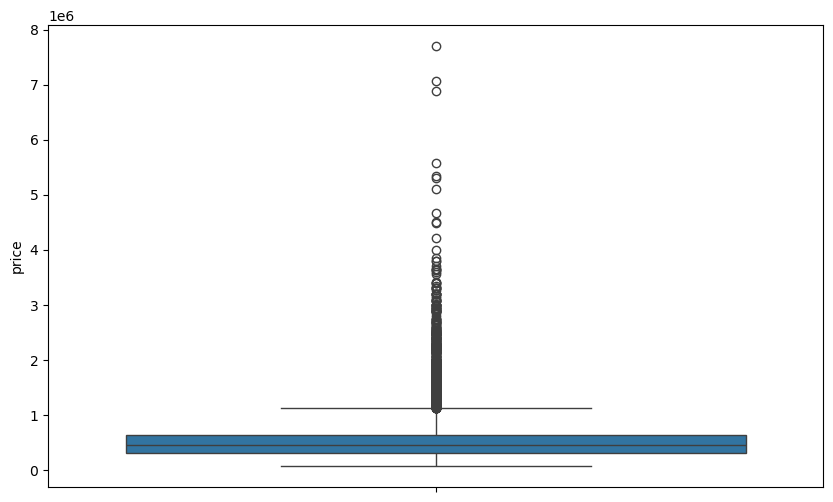

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(data["price"])

Percebemos a presença de inúmeros outliers, que são responsáveis por estragar nossas análises

In [101]:
#Removendo outliers
# Cálculo do IQR
Q1 = data['price'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = data['price'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1

# Definir limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados para remover outliers
data_so = data[(data['price'] >= limite_inferior) & (data['price'] <= limite_superior)]

# Verificar o novo tamanho do dataset
print(f"Tamanho original: {len(data)}")
print(f"Tamanho após remoção de outliers: {len(data_so)}")


Tamanho original: 21613
Tamanho após remoção de outliers: 20467


<Axes: ylabel='price'>

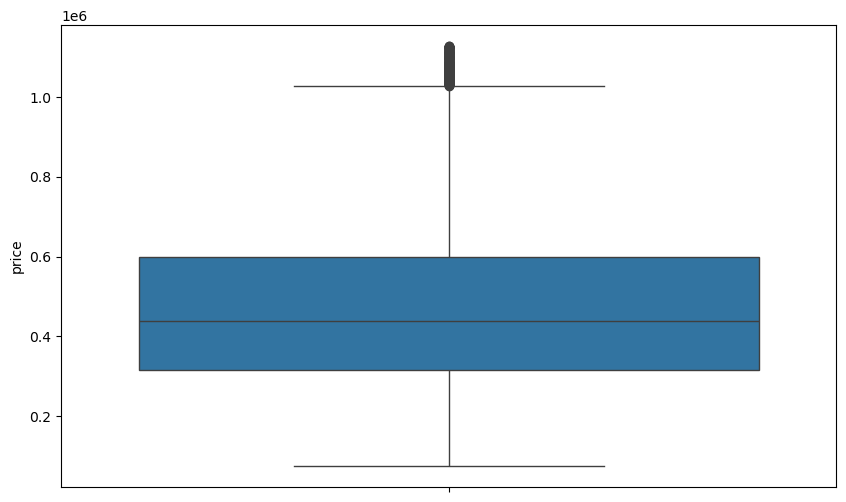

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(data_so["price"])

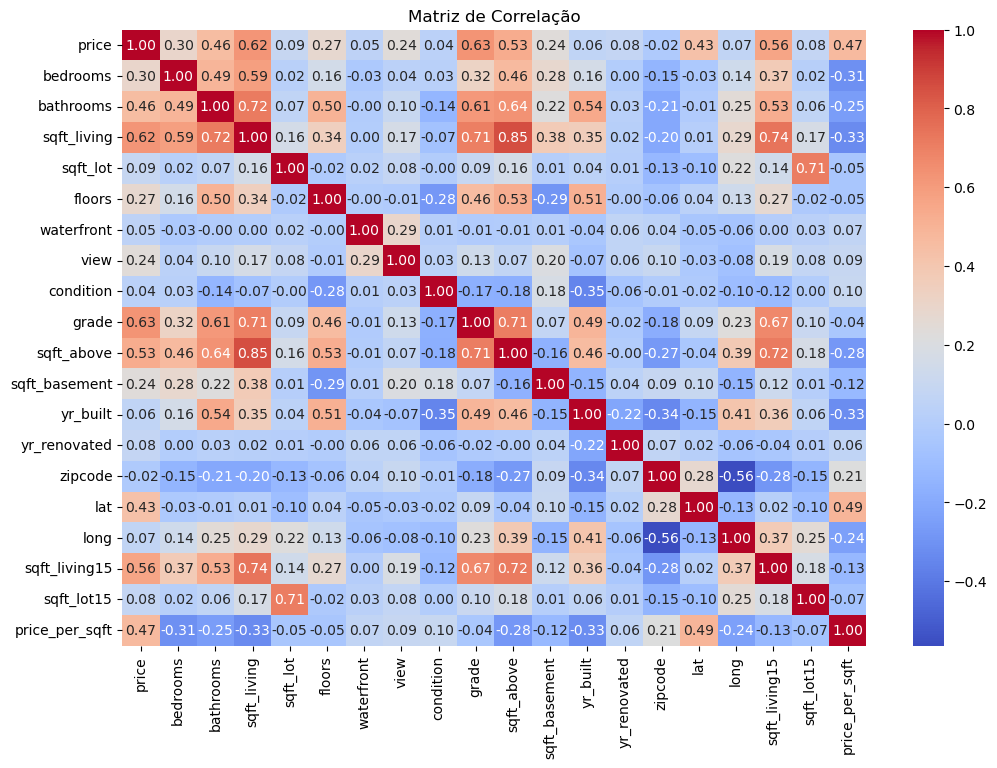

In [103]:
# Matriz de Correlação
correlation_matrix = data_so.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

Correlação com o Preço (price):

- Variáveis com maior correlação positiva:
    - sqft_living (0.62): Área útil é o fator mais correlacionado com o preço, indicando que imóveis maiores tendem a ser mais caros.

    - grade (0.63): Qualidade da construção também é fortemente associada ao preço.
    - sqft_above (0.53): A área acima do porão é similarmente importante.
- Variáveis com menor correlação positiva:
    - bathrooms (0.46): Número de banheiros influencia o preço, mas com uma correlação mais moderada.
    - view (0.26): Vista do imóvel tem uma relação positiva moderada com o preço.
- Correlação negativa:
    - yr_built (-0.06): Ano de construção tem uma correlação muito fraca com o preço.
    - zipcode (-0.02): Localização por código postal mostra correlação praticamente nula.
- Relações entre outras variáveis:
    - sqft_living e sqft_above possuem uma alta correlação (0.85), indicando que essas variáveis medem aspectos semelhantes.
    - price_per_sqft tem correlação positiva com price (0.47), mas mais moderada, o que pode indicar alta variabilidade nos preços por metro quadrado.

### Não concordo com zipcode ter baixa relação com o preço, pois é uma variável categórica e deve ser tratada da forma correta, portanto farei uma junção de zipcodes pela média futuramente

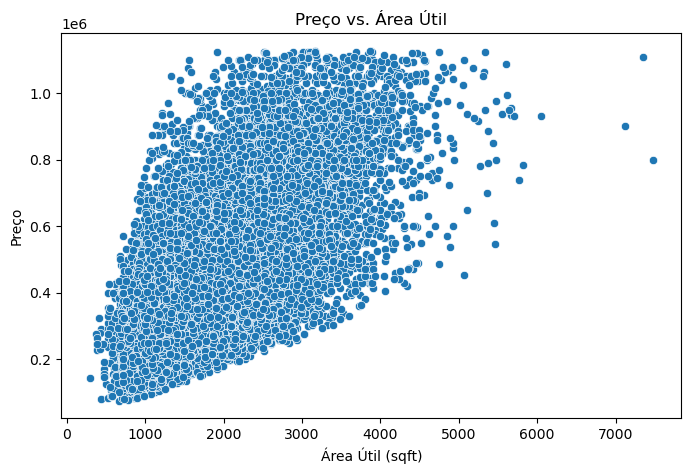

In [104]:
# Scatter plot: Preço vs. Área útil
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_so['sqft_living'], y=data['price'])
plt.title("Preço vs. Área Útil")
plt.xlabel("Área Útil (sqft)")
plt.ylabel("Preço")
plt.show()

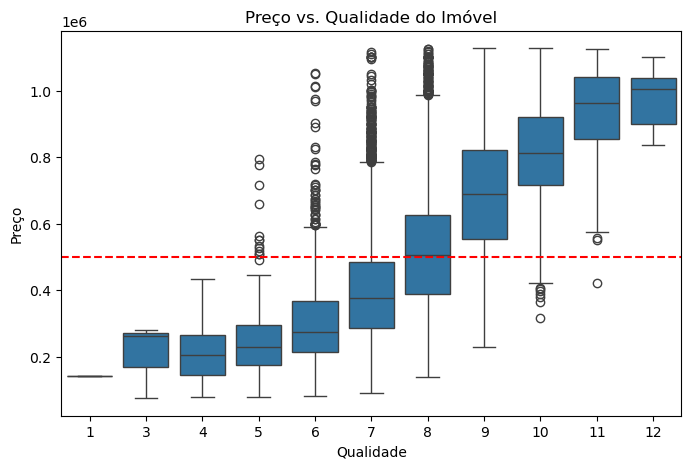

In [105]:
# Scatter plot: Preço vs. Qualidade (Grade)
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_so['grade'], y=data_so['price'])
plt.title("Preço vs. Qualidade do Imóvel")
plt.xlabel("Qualidade")
plt.ylabel("Preço")
plt.axhline(y=500000, color="red", linestyle="--", label="Preço 500k")
plt.show()

# Após remover Outliers

In [106]:
data_so.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price_per_sqft'],
      dtype='object')

In [107]:
categorical_columns = ['grade', 'waterfront', 'condition']
data_so = pd.get_dummies(data_so, columns=categorical_columns, drop_first=True)

In [108]:
# Calcular a média do preço por zipcode no dataset completo
zipcode_mean_price = data_so.groupby('zipcode')['price'].mean()

# Mapear a média do preço para a coluna zipcode no dataset completo
data_so['zipcode_mean_price'] = data_so['zipcode'].map(zipcode_mean_price)

In [109]:


# Selecionar as variáveis independentes e dependente
X = data_so[['sqft_living', 'zipcode_mean_price'] +
            ['grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
                'grade_9', 'grade_10', 'grade_11', 'grade_12',
                'waterfront_1',
                'condition_2', 'condition_3', 'condition_4', 'condition_5',
                'view']]
y = data_so['price']



In [110]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
# Fazer previsões
y_pred = model.predict(X_test)

In [112]:
# Avaliar o modelo
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.7744734978842244
MAE: 72144.7400962414
RMSE: 97488.24230700645


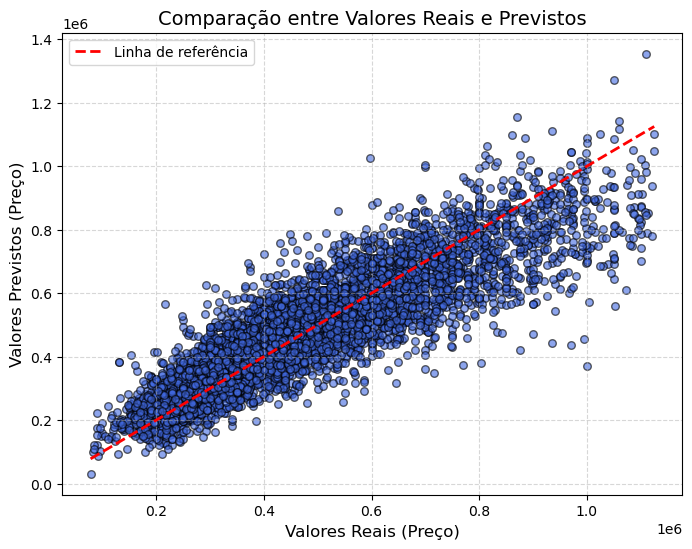

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="royalblue", edgecolor="k", s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Linha de referência")
plt.title("Comparação entre Valores Reais e Previstos", fontsize=14)
plt.xlabel("Valores Reais (Preço)", fontsize=12)
plt.ylabel("Valores Previstos (Preço)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)  # Adicionar uma grade leve
plt.show()


### Os pontos próximos à linha vermelha mostram previsões precisas.

In [114]:
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

print("Melhor alpha:", ridge_cv.best_params_)
print("Melhor R² com validação cruzada:", ridge_cv.best_score_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Melhor alpha: {'alpha': 10}
Melhor R² com validação cruzada: 0.7810348431892408
MAE: 72144.7400962414
RMSE: 97488.24230700645


c:\Users\teodo\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.16493e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


- O Rscore melhorou consideravelmente
- A CV indicou que o modelo não está super ajustado

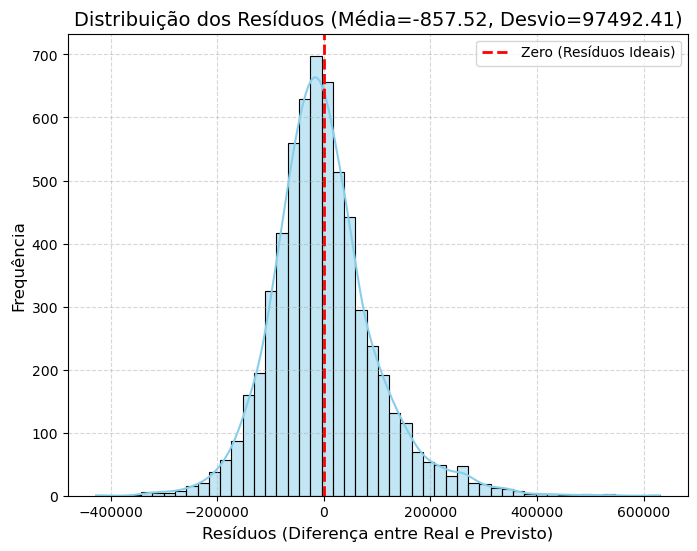

In [115]:
import numpy as np

# Calcular média e desvio padrão dos resíduos
residuos = y_test - y_pred
mean_residuals = residuos.mean()
std_residuals = residuos.std()

plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=50, kde=True, color="skyblue", edgecolor="black")
plt.axvline(0, color='red', linestyle='--', linewidth=2, label="Zero (Resíduos Ideais)")
plt.title(f"Distribuição dos Resíduos (Média={mean_residuals:.2f}, Desvio={std_residuals:.2f})", fontsize=14)
plt.xlabel("Resíduos (Diferença entre Real e Previsto)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)  # Adicionar uma grade leve
plt.show()


### Coloque uma linha pontilhada no 0, pois a simetria e concentração em zero indicam um bom ajuste do modelo.

### Importância das variáveis

In [116]:
coeficientes = pd.DataFrame({'Variável': X.columns, 'Coeficiente': model.coef_})
print(coeficientes.sort_values(by='Coeficiente', ascending=False))


              Variável    Coeficiente
10            grade_11  294967.208057
9             grade_10  220465.061437
11            grade_12  206868.549606
8              grade_9  181874.169100
16         condition_5  121612.993188
12        waterfront_1  120887.791433
7              grade_8  112669.584639
6              grade_7   77976.625054
15         condition_4   77063.921585
3              grade_4   60819.671493
14         condition_3   58153.961892
5              grade_6   57849.345362
2              grade_3   44942.680300
17                view   40516.496557
4              grade_5   38324.557518
13         condition_2   36182.484640
0          sqft_living      94.976990
1   zipcode_mean_price       0.809806


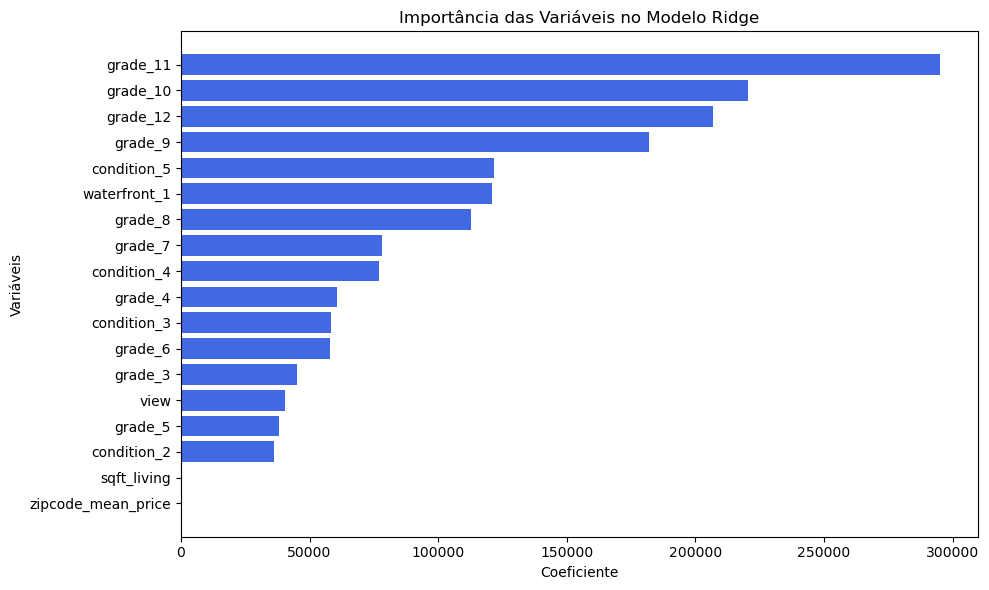

In [117]:
# Criar DataFrame ordenado
coeficientes = pd.DataFrame({'Variável': X.columns, 'Coeficiente': model.coef_})
coeficientes = coeficientes.sort_values(by='Coeficiente', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(coeficientes['Variável'], coeficientes['Coeficiente'], color="royalblue")
plt.xlabel("Coeficiente")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Modelo Ridge")
plt.gca().invert_yaxis()  # Inverter eixo Y para mostrar as maiores no topo
plt.tight_layout()
plt.show()